In [1]:
import pandas
import seaborn
import numpy
import seaborn

import sklearn.impute
import sklearn.preprocessing
import sklearn.ensemble
pandas.set_option('display.max_colwidth', None)  #Set to None for unlimited column width

 
%matplotlib inline

In [2]:
data_train = pandas.read_csv('../data/high_salary.train.csv').set_index('id')
data_train

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
2103,438607793.0,1341.0,2.0,self-emp-not-inc,335549.0,prof-school,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,USA,united-states,1.0
14649,555786276.0,5891.0,0.0,private,98287.0,hs-grad,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
7379,350318677.0,4291.0,2.0,self-emp-not-inc,127740.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,USA,united-states,0.0
24479,356142771.0,3392.0,2.0,self-emp-not-inc,48553.0,some-college,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,0.0
19532,385803045.0,492.0,3.0,private,403061.0,1st-4th,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,MEX,mexico,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,181655516.0,361.0,0.0,private,42706.0,some-college,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,USA,united-states,0.0
2192,796404433.0,950.0,2.0,local-gov,103759.0,some-college,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,USA,united-states,0.0
8250,622635909.0,8689.0,0.0,private,316184.0,hs-grad,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,USA,united-states,0.0


In [3]:
data_test= pandas.read_csv('../data/high_salary.test.csv').set_index('id')
data_test

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country,label
id,,,,,,,,,,,,,,,,,,
12849,335086368.0,4170.0,1.0,private,509500.0,bachelors,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,USA,united-states,1.0
1460,732733728.0,5442.0,0.0,private,243368.0,preschool,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,MEX,mexico,0.0
13594,807579036.0,7659.0,2.0,private,144524.0,hs-grad,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,USA,united-states,0.0
14400,201637967.0,4318.0,3.0,private,150975.0,hs-grad,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,USA,united-states,0.0
14333,758267678.0,8392.0,2.0,private,136419.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,USA,united-states,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,928104737.0,5063.0,1.0,private,346736.0,assoc-acdm,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,USA,united-states,0.0
2952,516722538.0,6064.0,2.0,private,54422.0,assoc-acdm,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,USA,united-states,1.0
9470,197607445.0,1195.0,4.0,state-gov,124971.0,doctorate,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN,NaN,1.0


In [4]:
data_live= pandas.read_csv('../data/high_salary.live.csv').set_index('id')
data_live

,social-security-number,house-number,age-group,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country-code,native-country
id,,,,,,,,,,,,,,,,,
6111,565712576.0,9337.0,0.0,private,287357.0,11th,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,USA,united-states
11214,329599477.0,6457.0,1.0,private,167558.0,hs-grad,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,MEX,mexico
5554,222432362.0,189.0,4.0,private,27385.0,hs-grad,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
25131,209882990.0,2048.0,2.0,local-gov,153976.0,masters,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,USA,united-states
14324,936607310.0,8185.0,3.0,private,20956.0,hs-grad,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,USA,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,331613078.0,6349.0,4.0,private,117898.0,bachelors,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,USA,united-states
8375,353499588.0,5768.0,4.0,private,298546.0,hs-grad,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,USA,united-states
13888,604365500.0,6286.0,1.0,private,36340.0,11th,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,USA,united-states


In [5]:
data_train.dtypes

social-security-number    float64
house-number              float64
age-group                 float64
workclass                  object
fnlwgt                    float64
education                  object
education-num             float64
marital-status             object
occupation                 object
relationship               object
race                       object
sex                        object
capitalgain               float64
capitalloss               float64
hoursperweek              float64
native-country-code        object
native-country             object
label                     float64
dtype: object

In [6]:
unique_values_data_train = pandas.DataFrame({column: [data_train[column].unique()] for column in data_train.columns}).T
unique_values_data_train.columns = ['Unique Values']
unique_values_data_train

,Unique Values
social-security-number,"[438607793.0, 555786276.0, 350318677.0, 356142771.0, 385803045.0, 416227110.0, 716207410.0, 431455994.0, 174071120.0, 886868006.0, 502138829.0, 981226363.0, 709120497.0, 323262945.0, 214744561.0, 239855072.0, 542521904.0, 219335419.0, 779356319.0, 793273505.0, 636152431.0, 663663491.0, 564418479.0, 437358492.0, 976570473.0, 224837318.0, 768922801.0, 613820744.0, 558734159.0, 678428792.0, 592851636.0, 677452312.0, 648213258.0, 804246780.0, 735811806.0, 349598997.0, 689625427.0, 922096742.0, 199632230.0, 345978762.0, 377915178.0, 469633627.0, 904698853.0, 841841677.0, 369838418.0, 407947446.0, 407961853.0, 151283570.0, 591251602.0, 282852582.0, 827642965.0, 943015417.0, 496359826.0, 399101934.0, 829503128.0, 840480134.0, 620116809.0, 414287830.0, 156379178.0, 388252434.0, 656378700.0, 334325988.0, 667965141.0, 463786044.0, 926435206.0, 141929682.0, 844885838.0, 609785017.0, 478669833.0, 507962186.0, 596898774.0, 993717433.0, 718772309.0, 522187146.0, 636266293.0, 184742156.0, 878881883.0, 588933595.0, 680264294.0, 722583256.0, 532630589.0, 537429292.0, 146389001.0, 395404158.0, 800838455.0, 261859616.0, 584674351.0, 114291923.0, 152548476.0, 829673679.0, 561924071.0, 371416319.0, 342698403.0, 488718833.0, 104229974.0, 880255048.0, 580161508.0, 236507379.0, 804050882.0, 887051579.0, ...]"
house-number,"[1341.0, 5891.0, 4291.0, 3392.0, 492.0, 2291.0, 5586.0, 6129.0, 6870.0, 9967.0, 7684.0, 5848.0, 7024.0, 1052.0, 4177.0, 1916.0, 7835.0, 3321.0, 6530.0, 4916.0, 1652.0, 1056.0, 1937.0, 6151.0, 3963.0, 8298.0, 2693.0, 6135.0, 7041.0, 6921.0, 9148.0, 8282.0, 8202.0, 3705.0, 2279.0, 7248.0, 2424.0, 3079.0, 3878.0, 335.0, 639.0, 6605.0, 4351.0, 1587.0, 5526.0, 7057.0, 4829.0, 3239.0, 3649.0, 3949.0, 4942.0, 1301.0, 1515.0, 5223.0, 2041.0, 3025.0, 7311.0, 6549.0, 6598.0, 1780.0, 9670.0, 6195.0, 341.0, 1037.0, 5767.0, 8388.0, 6275.0, 9591.0, 7626.0, 5849.0, 3829.0, 4169.0, 4110.0, 8782.0, 2510.0, 3914.0, 7743.0, 9822.0, 9311.0, 1455.0, 2862.0, 4582.0, 2779.0, 7738.0, 5376.0, 2134.0, 9378.0, 7203.0, 3615.0, 8174.0, 9896.0, 5382.0, 8269.0, 6239.0, 8085.0, 8230.0, 1036.0, 176.0, 6934.0, 4535.0, ...]"
age-group,"[2.0, 0.0, 3.0, 4.0, 1.0, nan]"
workclass,"[self-emp-not-inc, private, nan, self-emp-inc, local-gov, federal-gov, state-gov, never-worked, without-pay]"
fnlwgt,"[335549.0, 98287.0, 127740.0, 48553.0, 403061.0, 202872.0, 162825.0, 169104.0, 40052.0, 96844.0, 475322.0, 155293.0, 160192.0, 91039.0, 27763.0, 111476.0, 383384.0, 237943.0, 581128.0, 188563.0, 286689.0, 96130.0, 120131.0, 171331.0, 120676.0, 191503.0, 211948.0, 183470.0, 355700.0, 76720.0, 34419.0, 24264.0, 224141.0, 200295.0, 144460.0, 436493.0, 125892.0, 140001.0, 136137.0, 120270.0, 60269.0, 186121.0, 159109.0, 177307.0, 414994.0, 223131.0, 144259.0, 342709.0, 195105.0, 114874.0, 98586.0, 184529.0, 189346.0, 533660.0, 180052.0, 95708.0, 33551.0, 85604.0, 159770.0, 423217.0, 75313.0, 161155.0, 149368.0, 303973.0, 297322.0, 199903.0, 188861.0, 282153.0, 225724.0, 27776.0, 373344.0, 115431.0, 269722.0, 80655.0, 400535.0, 154374.0, 141537.0, 594187.0, 197583.0, 141481.0, 203784.0, 77132.0, 161472.0, 156774.0, 35034.0, 172034.0, 202692.0, 100950.0, 109912.0, 124076.0, 193882.0, 171216.0, 122353.0, 263970.0, 197886.0, 158592.0, 108247.0, 34862.0, 28160.0, 190385.0, ...]"
education,"[prof-school, hs-grad, some-college, 1st-4th, masters, bachelors, 11th, assoc-acdm, assoc-voc, doctorate, 7th-8th, 10th, 9th, 5th-6th, 12th, nan, preschool]"
education-num,"[15.0, 9.0, 10.0, 2.0, 14.0, 13.0, 7.0, 12.0, 11.0, 16.0, 4.0, 6.0, 5.0, 3.0, 8.0, 1.0, nan]"
marital-status,"[never-married, married-civ-spouse, separated, divorced, married-af-spouse, widowed, married-spouse-absent, nan]"
occupation,"[prof-specialty, sales, exec-managerial, craft-repair, machine-op-inspct, nan, other-service, handlers-cleaners, tech-support, transport-moving, farming-fishing, priv-house-serv, adm-clerical, protective-serv, armed-forces]"
relationship,"[not-in-family, husban

In [7]:
categorical_features= [
    'social-security-number',
    'house-number',
    'age-group',
    'workclass',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capitalgain',
    'capitalloss',
    'hoursperweek',
    'native-country-code',
    'native-country'
]

In [8]:
#check if there are mismatches for native-country-code and native-country
country_mapping = {
    "USA": ["united-states"], 
    "MEX": ["mexico"], 
    "GBR": ["england", "scotland"],  # Both england and scotland are valid
    "ITA": ["italy"], 
    "SLV": ["el-salvador"],
    "CAN": ["canada"], 
    "DUE": ["germany"], 
    "JAM": ["jamaica"], 
    "ECU": ["ecuador"], 
    "JPN": ["japan"], 
    "DOM": ["dominican-republic"], 
    "IRL": ["ireland"], 
    "PHL": ["philippines"], 
    "CUB": ["cuba"], 
    "VNM": ["vietnam"], 
    "GTM": ["guatemala"], 
    "TWN": ["taiwan"], 
    "HUN": ["hungary"], 
    "FRA": ["france"],
    "UMI": ["outlying-us(guam-usvi-etc)"], 
    "HKG": ["hong"], 
    "KHM": ["cambodia"], 
    "IRN": ["iran"], 
    "CHN": ["china"], 
    "COL": ["columbia"], 
    "PRI": ["puerto-rico"], 
    "YUG": ["yugoslavia"], 
    "POL": ["poland"], 
    "GRC": ["greece"], 
    "TTO": ["trinadad&tobago"], 
    "IND": ["india"], 
    "NIC": ["nicaragua"], 
    "ZAF": ["south"], 
    "PRT": ["portugal"], 
    "HND": ["honduras"], 
    "THA": ["thailand"], 
    "HTI": ["haiti"], 
    "LAO": ["laos"], 
    "PER": ["peru"], 
    "NLD": ["holand-netherlands"]
}
def validate_country(row):
    code = row['native-country-code']
    country = row['native-country']
    #ignore missing values for validation
    if pandas.isna(code) and pandas.isna(country):
        return True
    expected_countries = country_mapping.get(code)
    if expected_countries and country in expected_countries:
        return True
    return False
    
data_train['is_valid'] = data_train.apply(validate_country, axis=1)

mismatches = data_train[data_train['is_valid'] == False]
print(mismatches)

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

       social-security-number  house-number  age-group         workclass  \
id                                                                         
7928              771328156.0        8358.0        1.0           private   
25016             360009482.0        1959.0        2.0           private   
15883             932410654.0        3142.0        4.0           private   
27463             771592255.0        8456.0        1.0           private   
24068             236752108.0        5902.0        4.0           private   
6397              162276136.0        2856.0        1.0           private   
1409              492882060.0        2341.0        3.0           private   
11416             130475027.0        5016.0        4.0               NaN   
13947             485961154.0        3685.0        2.0           private   
9332              665219625.0        2121.0        0.0           private   
25022             827866071.0        8948.0        4.0      self-emp-inc   
21166       

In [9]:
data_test['is_valid'] = data_test.apply(validate_country, axis=1)

mismatches = data_test[data_test['is_valid'] == False]
print(mismatches)

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

       social-security-number  house-number  age-group     workclass  \
id                                                                     
4091              396503521.0        6889.0        1.0     local-gov   
20596             470291895.0        1963.0        2.0       private   
25775             886792453.0        3786.0        1.0       private   
18378             574784895.0        3226.0        2.0       private   
4253              595590472.0        7892.0        4.0  self-emp-inc   
24440             428502433.0        8602.0        2.0       private   

         fnlwgt     education  education-num      marital-status  \
id                                                                 
4091   251854.0       hs-grad            9.0       never-married   
20596  162028.0          11th            7.0            divorced   
25775  276153.0     bachelors           13.0       never-married   
18378  167151.0     bachelors           13.0            divorced   
4253   249072.0

In [10]:
data_live['is_valid'] = data_live.apply(validate_country, axis=1)

mismatches = data_live[data_live['is_valid'] == False]
print(mismatches)

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

       social-security-number  house-number  age-group workclass    fnlwgt  \
id                                                                           
10104             669532414.0        1706.0        1.0   private  191834.0   
12139             536283632.0        6598.0        2.0   private  345789.0   
4093              115861924.0        4991.0        1.0   private  116372.0   
26612             465153339.0        6105.0        2.0   private   61178.0   
9932              410906971.0        1986.0        4.0   private  153484.0   
14004             350547553.0        5258.0        2.0   private  709445.0   
11466             480920331.0        3265.0        1.0   private  167049.0   

       education  education-num      marital-status        occupation  \
id                                                                      
10104    hs-grad            9.0  married-civ-spouse  transport-moving   
12139  bachelors           13.0  married-civ-spouse    prof-specialty   
4093 

In [11]:

def fill_missing_country(row):
    if pandas.isna(row['native-country']) and not pandas.isna(row['native-country-code']):
        # Get the country for the provided code
        country_code = row['native-country-code']
        country = country_mapping.get(country_code)
        if country:
            return country[0]  # Assign the first country from the list (assuming only one)
    return row['native-country'] 

data_train['native-country'] = data_train.apply(fill_missing_country, axis=1)

data_train['is_valid'] = data_train.apply(validate_country, axis=1)

mismatches = data_train[data_train['is_valid'] == False]
print(mismatches)

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

       social-security-number  house-number  age-group         workclass  \
id                                                                         
15883             932410654.0        3142.0        4.0           private   
27463             771592255.0        8456.0        1.0           private   
24068             236752108.0        5902.0        4.0           private   
11416             130475027.0        5016.0        4.0               NaN   
25022             827866071.0        8948.0        4.0      self-emp-inc   
17277             663293953.0         991.0        1.0           private   
1773              612761541.0        1254.0        3.0  self-emp-not-inc   
10984             305682105.0         977.0        1.0           private   
1647              194355473.0        6570.0        2.0           private   
15871             538121028.0         708.0        2.0           private   
21942             507497932.0        1567.0        2.0  self-emp-not-inc   
186         

In [12]:
data_test['native-country'] = data_test.apply(fill_missing_country, axis=1)

data_test['is_valid'] = data_test.apply(validate_country, axis=1)

mismatches = data_test[data_test['is_valid'] == False]
print(mismatches)

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

       social-security-number  house-number  age-group  workclass    fnlwgt  \
id                                                                            
4091              396503521.0        6889.0        1.0  local-gov  251854.0   
20596             470291895.0        1963.0        2.0    private  162028.0   
25775             886792453.0        3786.0        1.0    private  276153.0   
24440             428502433.0        8602.0        2.0    private  269722.0   

       education  education-num      marital-status       occupation  \
id                                                                     
4091     hs-grad            9.0       never-married  protective-serv   
20596       11th            7.0            divorced            sales   
25775  bachelors           13.0       never-married     tech-support   
24440  bachelors           13.0  married-civ-spouse  exec-managerial   

        relationship                race     sex  capitalgain  capitalloss  \
id            

In [13]:
data_live['native-country'] = data_live.apply(fill_missing_country, axis=1)

data_live['is_valid'] = data_live.apply(validate_country, axis=1)

mismatches = data_live[data_live['is_valid'] == False]
print(mismatches)

mismatch_count = len(mismatches)
print(f"Total mismatches: {mismatch_count}")

       social-security-number  house-number  age-group workclass    fnlwgt  \
id                                                                           
4093              115861924.0        4991.0        1.0   private  116372.0   
14004             350547553.0        5258.0        2.0   private  709445.0   
11466             480920331.0        3265.0        1.0   private  167049.0   

       education  education-num      marital-status       occupation  \
id                                                                     
4093   bachelors           13.0       never-married            sales   
14004    hs-grad            9.0           separated     craft-repair   
11466  bachelors           13.0  married-civ-spouse  priv-house-serv   

         relationship   race     sex  capitalgain  capitalloss  hoursperweek  \
id                                                                             
4093    not-in-family  white  female          0.0          0.0           3.0   
14004  o

In [14]:
#removing irrelavent and duplicate features
columns_to_remove = ['social-security-number', 'house-number', 'education', 'native-country-code']

categorical_features = [feature for feature in categorical_features if feature not in columns_to_remove]

categorical_features

['age-group',
 'workclass',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native-country']

In [15]:
#label distribution
data_train['label'].value_counts()

label
0.0    9102
1.0    6573
Name: count, dtype: int64

In [16]:
data_test['label'].value_counts()

label
0.0    3033
1.0    2192
Name: count, dtype: int64

In [17]:
data_train.isna().sum(axis='index')

social-security-number     11
house-number               18
age-group                   6
workclass                 792
fnlwgt                     16
education                  15
education-num              12
marital-status             20
occupation                791
relationship               14
race                       13
sex                        14
capitalgain                17
capitalloss                14
hoursperweek               18
native-country-code       301
native-country            283
label                       0
is_valid                    0
dtype: int64

In [18]:
data_test.isna().sum(axis='index')

social-security-number      3
house-number                9
age-group                   7
workclass                 265
fnlwgt                      7
education                   5
education-num               2
marital-status              3
occupation                263
relationship                7
race                        9
sex                         8
capitalgain                 6
capitalloss                 7
hoursperweek                3
native-country-code        98
native-country             94
label                       0
is_valid                    0
dtype: int64

In [19]:
data_live.isna().sum(axis='index')

social-security-number      2
house-number                9
age-group                  13
workclass                 345
fnlwgt                      4
education                   7
education-num               8
marital-status              9
occupation                347
relationship               13
race                        7
sex                         7
capitalgain                 8
capitalloss                10
hoursperweek               13
native-country-code       122
native-country            119
is_valid                    0
dtype: int64

In [20]:
data_train_categorical_features= data_train[categorical_features]
data_train_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states


In [21]:
data_test_categorical_features= data_test[categorical_features]
data_test_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
12849,1.0,private,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states
1460,0.0,private,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico
13594,2.0,private,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,united-states
14400,3.0,private,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,NaN,0.0,2.0,united-states
14333,2.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,united-states
2952,2.0,private,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,united-states
9470,4.0,state-gov,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,NaN


In [22]:
data_live_categorical_features= data_live[categorical_features]
data_live_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
6111,0.0,private,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,united-states
11214,1.0,private,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,mexico
5554,4.0,private,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
25131,2.0,local-gov,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states
14324,3.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
25998,4.0,private,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
8375,4.0,private,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,united-states
13888,1.0,private,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,united-states


In [23]:
categorical_imputer = sklearn.impute.SimpleImputer(
    strategy= 'most_frequent' 
)
categorical_imputer

SimpleImputer(strategy='most_frequent')

In [24]:
categorical_imputer.fit(
    data_train_categorical_features
)

SimpleImputer(strategy='most_frequent')

In [25]:
data_train_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_train_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_train_categorical_features.index
)
data_train_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states


In [26]:
data_test_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_test_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_test_categorical_features.index
)
data_test_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
12849,1.0,private,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states
1460,0.0,private,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico
13594,2.0,private,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,united-states
14400,3.0,private,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,0.0,0.0,2.0,united-states
14333,2.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,united-states
2952,2.0,private,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,united-states
9470,4.0,state-gov,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states


In [27]:
data_live_categorical_features = pandas.DataFrame(
    data = categorical_imputer.transform(data_live_categorical_features),
    columns = categorical_imputer.get_feature_names_out(),
    index = data_live_categorical_features.index
)
data_live_categorical_features

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
id,,,,,,,,,,,,
6111,0.0,private,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,united-states
11214,1.0,private,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,mexico
5554,4.0,private,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
25131,2.0,local-gov,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states
14324,3.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,united-states
...,...,...,...,...,...,...,...,...,...,...,...,...
25998,4.0,private,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states
8375,4.0,private,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,united-states
13888,1.0,private,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,united-states


In [28]:
data_train_categorical_features.isna().sum(axis='index')

age-group         0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
dtype: int64

In [29]:
data_test_categorical_features.isna().sum(axis='index')

age-group         0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
dtype: int64

In [30]:
data_live_categorical_features.isna().sum(axis='index')

age-group         0
workclass         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
dtype: int64

In [31]:
numerical_features=[
    'fnlwgt',
]

In [32]:
data_train_numerical_features= data_train[numerical_features]
data_train_numerical_features

,fnlwgt
id,
2103,335549.0
14649,98287.0
7379,127740.0
24479,48553.0
19532,403061.0
...,...
8695,42706.0
2192,103759.0
8250,316184.0


In [33]:
data_test_numerical_features= data_test[numerical_features]
data_test_numerical_features

,fnlwgt
id,
12849,509500.0
1460,243368.0
13594,144524.0
14400,150975.0
14333,136419.0
...,...
981,346736.0
2952,54422.0
9470,124971.0


In [34]:
data_live_numerical_features= data_live[numerical_features]
data_live_numerical_features

,fnlwgt
id,
6111,287357.0
11214,167558.0
5554,27385.0
25131,153976.0
14324,20956.0
...,...
25998,117898.0
8375,298546.0
13888,36340.0


In [35]:
# default mean value
numerical_imputer= sklearn.impute.SimpleImputer()
numerical_imputer

SimpleImputer()

In [36]:
numerical_imputer.fit(data_train_numerical_features)

SimpleImputer()

In [37]:
data_train_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_train_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_train_numerical_features.index
)
data_train_numerical_features

,fnlwgt
id,
2103,335549.0
14649,98287.0
7379,127740.0
24479,48553.0
19532,403061.0
...,...
8695,42706.0
2192,103759.0
8250,316184.0


In [38]:
data_test_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_test_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_test_numerical_features.index
)
data_test_numerical_features

,fnlwgt
id,
12849,509500.0
1460,243368.0
13594,144524.0
14400,150975.0
14333,136419.0
...,...
981,346736.0
2952,54422.0
9470,124971.0


In [39]:
data_live_numerical_features = pandas.DataFrame(
    data = numerical_imputer.transform(data_live_numerical_features),
    columns = numerical_imputer.get_feature_names_out(),
    index = data_live_numerical_features.index
)
data_live_numerical_features

,fnlwgt
id,
6111,287357.0
11214,167558.0
5554,27385.0
25131,153976.0
14324,20956.0
...,...
25998,117898.0
8375,298546.0
13888,36340.0


In [40]:
data_train_numerical_features.isna().sum(axis='index')

fnlwgt    0
dtype: int64

In [41]:
data_test_numerical_features.isna().sum(axis='index')

fnlwgt    0
dtype: int64

In [42]:
data_live_numerical_features.isna().sum(axis='index')

fnlwgt    0
dtype: int64

In [43]:
data_train = (
    data_train_categorical_features
    .join(data_train_numerical_features)
    .join(data_train['label'])
)
data_train

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt,label
id,,,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states,335549.0,1.0
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states,98287.0,0.0
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states,127740.0,0.0
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states,48553.0,0.0
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico,403061.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states,42706.0,0.0
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states,103759.0,0.0
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states,316184.0,0.0


In [44]:
data_test = (
    data_test_categorical_features
    .join(data_test_numerical_features)
    .join(data_test['label'])
)
data_test

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt,label
id,,,,,,,,,,,,,,
12849,1.0,private,13.0,never-married,tech-support,not-in-family,white,female,2.0,0.0,2.0,united-states,509500.0,1.0
1460,0.0,private,1.0,never-married,farming-fishing,not-in-family,white,male,0.0,0.0,3.0,mexico,243368.0,0.0
13594,2.0,private,9.0,divorced,machine-op-inspct,unmarried,black,female,0.0,0.0,2.0,united-states,144524.0,0.0
14400,3.0,private,9.0,divorced,machine-op-inspct,not-in-family,amer-indian-eskimo,female,0.0,0.0,2.0,united-states,150975.0,0.0
14333,2.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states,136419.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.0,private,12.0,never-married,exec-managerial,own-child,white,female,0.0,0.0,3.0,united-states,346736.0,0.0
2952,2.0,private,12.0,married-civ-spouse,prof-specialty,wife,white,female,0.0,0.0,2.0,united-states,54422.0,1.0
9470,4.0,state-gov,16.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states,124971.0,1.0


In [45]:
data_live = (
    data_live_categorical_features
    .join(data_live_numerical_features)
)
data_live

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt
id,,,,,,,,,,,,,
6111,0.0,private,7.0,married-civ-spouse,protective-serv,husband,white,male,0.0,0.0,2.0,united-states,287357.0
11214,1.0,private,9.0,never-married,sales,unmarried,white,female,0.0,0.0,1.0,mexico,167558.0
5554,4.0,private,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states,27385.0
25131,2.0,local-gov,14.0,married-civ-spouse,prof-specialty,husband,white,male,0.0,0.0,2.0,united-states,153976.0
14324,3.0,private,9.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,2.0,united-states,20956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,4.0,private,13.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,3.0,united-states,117898.0
8375,4.0,private,9.0,married-civ-spouse,farming-fishing,husband,white,male,0.0,0.0,4.0,united-states,298546.0
13888,1.0,private,7.0,divorced,other-service,unmarried,white,female,0.0,0.0,1.0,united-states,36340.0


In [46]:
ordinal_features= [
    'age-group',
    'education-num',
    'capitalgain',
    'capitalloss',
    'hoursperweek'
]
ordinal_mapping = [
    [0.0, 1.0, 2.0, 3.0, 4.0],
    [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
    [0.0, 1.0, 2.0, 3.0, 4.0],
    [0.0, 1.0, 2.0, 3.0, 4.0],
    [0.0, 1.0, 2.0, 3.0, 4.0]
]

In [47]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder

OrdinalEncoder(categories=[[0.0, 1.0, 2.0, 3.0, 4.0],
                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                            11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 1.0, 2.0, 3.0, 4.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0]])

In [48]:
ordinal_encoder.fit(
    X = data_train[ordinal_features]
)

OrdinalEncoder(categories=[[0.0, 1.0, 2.0, 3.0, 4.0],
                           [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                            11.0, 12.0, 13.0, 14.0, 15.0, 16.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0], [0.0, 1.0, 2.0, 3.0, 4.0],
                           [0.0, 1.0, 2.0, 3.0, 4.0]])

In [49]:
data_train_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_train[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_ordinal_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
2103,2.0,14.0,0.0,4.0,2.0
14649,0.0,8.0,0.0,0.0,3.0
7379,2.0,8.0,0.0,0.0,4.0
24479,2.0,9.0,0.0,0.0,3.0
19532,3.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...
8695,0.0,9.0,0.0,0.0,2.0
2192,2.0,9.0,2.0,0.0,2.0
8250,0.0,8.0,0.0,0.0,2.0


In [50]:
data_test_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_test[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_ordinal_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
12849,1.0,12.0,2.0,0.0,2.0
1460,0.0,0.0,0.0,0.0,3.0
13594,2.0,8.0,0.0,0.0,2.0
14400,3.0,8.0,0.0,0.0,2.0
14333,2.0,8.0,0.0,0.0,3.0
...,...,...,...,...,...
981,1.0,11.0,0.0,0.0,3.0
2952,2.0,11.0,0.0,0.0,2.0
9470,4.0,15.0,0.0,0.0,2.0


In [51]:
data_live_ordinal_features = pandas.DataFrame(
    data    = ordinal_encoder.transform(data_live[ordinal_features]),
    columns = ordinal_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_live_ordinal_features

,age-group,education-num,capitalgain,capitalloss,hoursperweek
id,,,,,
6111,0.0,6.0,0.0,0.0,2.0
11214,1.0,8.0,0.0,0.0,1.0
5554,4.0,8.0,0.0,0.0,3.0
25131,2.0,13.0,0.0,0.0,2.0
14324,3.0,8.0,0.0,0.0,2.0
...,...,...,...,...,...
25998,4.0,12.0,0.0,0.0,3.0
8375,4.0,8.0,0.0,0.0,4.0
13888,1.0,6.0,0.0,0.0,1.0


In [52]:
nominal_features=[
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country'
]
nominal_mapping = [
    ["self-emp-not-inc", "private", "self-emp-inc", "local-gov", "federal-gov", "state-gov", "never-worked", "without-pay"],
    ["never-married", "married-civ-spouse", "separated", "divorced", "married-af-spouse", "widowed", "married-spouse-absent"],
    ["prof-specialty", "sales", "exec-managerial", "craft-repair", "machine-op-inspct", "other-service", "handlers-cleaners", "tech-support", "transport-moving", "farming-fishing", "priv-house-serv", "adm-clerical", "protective-serv", "armed-forces"],
    ["not-in-family", "husband", "other-relative", "wife", "own-child", "unmarried"],
    ["white", "amer-indian-eskimo", "black", "asian-pac-islander", "other"],
    ["male", "female"],
    ["united-states", "mexico", "england", "italy", "el-salvador", "canada", "germany", "jamaica", "ecuador", "japan", "dominican-republic", "ireland", "philippines", "cuba", "vietnam", "guatemala", "taiwan", "hungary", "france", "outlying-us(guam-usvi-etc)", "hong", "cambodia", "iran", "china", "columbia", "puerto-rico", "yugoslavia", "poland", "greece", "trinadad&tobago", "india", "nicaragua", "south", "portugal", "honduras", "thailand", "laos", "peru", "holand-netherlands", "haiti", "scotland"]
]
data_train

,age-group,workclass,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,fnlwgt,label
id,,,,,,,,,,,,,,
2103,2.0,self-emp-not-inc,15.0,never-married,prof-specialty,not-in-family,white,male,0.0,4.0,2.0,united-states,335549.0,1.0
14649,0.0,private,9.0,married-civ-spouse,sales,husband,white,male,0.0,0.0,3.0,united-states,98287.0,0.0
7379,2.0,self-emp-not-inc,9.0,married-civ-spouse,exec-managerial,husband,white,male,0.0,0.0,4.0,united-states,127740.0,0.0
24479,2.0,self-emp-not-inc,10.0,married-civ-spouse,craft-repair,husband,white,male,0.0,0.0,3.0,united-states,48553.0,0.0
19532,3.0,private,2.0,never-married,machine-op-inspct,other-relative,white,female,0.0,0.0,2.0,mexico,403061.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,private,10.0,never-married,prof-specialty,not-in-family,white,male,0.0,0.0,2.0,united-states,42706.0,0.0
2192,2.0,local-gov,10.0,married-civ-spouse,transport-moving,husband,white,male,2.0,0.0,2.0,united-states,103759.0,0.0
8250,0.0,private,9.0,never-married,other-service,other-relative,black,male,0.0,0.0,2.0,united-states,316184.0,0.0


In [53]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_mapping, sparse_output=False)
onehot_encoder

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                          ['united-states', 'mexico', 'england', 'italy',
                           'el-salvador', 'canada', 'germany', 'jamaica',
                           'ecuador', 'japan', 'dominican-republic', 'ireland',
                           'philippines', 'cuba', 'vietnam', 'guatemala',
                           'taiwan', 'hungary', 'france',
                           'outlying-us(guam-usvi-etc)', 'hong', 'cambodia',
                           'iran', 'china', 'columbia', 'puerto-rico',
                           'yugoslavia', 'poland', 'greece', 'trinadad&tobago', ...]],
              sparse_output=False)

In [54]:
onehot_encoder.fit(
    X=data_train[nominal_features]
)

OneHotEncoder(categories=[['self-emp-not-inc', 'private', 'self-emp-inc',
                           'local-gov', 'federal-gov', 'state-gov',
                           'never-worked', 'without-pay'],
                          ['never-married', 'married-civ-spouse', 'separated',
                           'divorced', 'married-af-spouse', 'widowed',
                           'married-spouse-absent'],
                          ['prof-specialty', 'sales', 'exec-managerial',
                           'craft-repair', 'machine-op-inspct', 'other-service',...
                          ['united-states', 'mexico', 'england', 'italy',
                           'el-salvador', 'canada', 'germany', 'jamaica',
                           'ecuador', 'japan', 'dominican-republic', 'ireland',
                           'philippines', 'cuba', 'vietnam', 'guatemala',
                           'taiwan', 'hungary', 'france',
                           'outlying-us(guam-usvi-etc)', 'hong', 'cambodia',
                           'iran', 'china', 'columbia', 'puerto-rico',
                           'yugoslavia', 'poland', 'greece', 'trinadad&tobago', ...]],
              sparse_output=False)

In [55]:
onehot_encoder.get_feature_names_out()

array(['workclass_self-emp-not-inc', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_local-gov',
       'workclass_federal-gov', 'workclass_state-gov',
       'workclass_never-worked', 'workclass_without-pay',
       'marital-status_never-married',
       'marital-status_married-civ-spouse', 'marital-status_separated',
       'marital-status_divorced', 'marital-status_married-af-spouse',
       'marital-status_widowed', 'marital-status_married-spouse-absent',
       'occupation_prof-specialty', 'occupation_sales',
       'occupation_exec-managerial', 'occupation_craft-repair',
       'occupation_machine-op-inspct', 'occupation_other-service',
       'occupation_handlers-cleaners', 'occupation_tech-support',
       'occupation_transport-moving', 'occupation_farming-fishing',
       'occupation_priv-house-serv', 'occupation_adm-clerical',
       'occupation_protective-serv', 'occupation_armed-forces',
       'relationship_not-in-family', 'relationship_husband',
       'r

In [56]:
data_train_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_train.index
)
data_train_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
2103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
data_test_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_test.index
)
data_test_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
12849,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9470,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
data_live_nominal_features = pandas.DataFrame(
    data    = onehot_encoder.transform(data_live[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index   = data_live.index
)
data_live_nominal_features

,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,workclass_federal-gov,workclass_state-gov,workclass_never-worked,workclass_without-pay,marital-status_never-married,marital-status_married-civ-spouse,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
6111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [60]:
standard_scaler.fit(data_train[numerical_features])

StandardScaler()

In [61]:
data_train_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_train[numerical_features]),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_train_numerical_features.index
)
data_train_numerical_features

,fnlwgt
id,
2103,1.395470
14649,-0.873898
7379,-0.592186
24479,-1.349595
19532,2.041210
...,...
8695,-1.405521
2192,-0.821560
8250,1.210247


In [62]:
data_test_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_test[numerical_features]),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_test_numerical_features.index
)
data_test_numerical_features

,fnlwgt
id,
12849,3.059280
1460,0.513775
13594,-0.431650
14400,-0.369947
14333,-0.509173
...,...
981,1.502472
2952,-1.293459
9470,-0.618671


In [63]:
data_live_numerical_features = pandas.DataFrame(
    data    = standard_scaler.transform(data_live[numerical_features]),
    columns = standard_scaler.get_feature_names_out(),
    index   = data_live_numerical_features.index
)
data_live_numerical_features

,fnlwgt
id,
6111,0.934522
11214,-0.211334
5554,-1.552063
25131,-0.341243
14324,-1.613555
...,...
25998,-0.686323
8375,1.041543
13888,-1.466410


In [64]:
data_train = (
    data_train_numerical_features
        .join(data_train_ordinal_features)
        .join(data_train_nominal_features)
        .join(data_train['label'])
)
data_train

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,label
id,,,,,,,,,,,,,,,,,,,,,
2103,1.395470,2.0,14.0,0.0,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14649,-0.873898,0.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7379,-0.592186,2.0,8.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24479,-1.349595,2.0,9.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,2.041210,3.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.405521,0.0,9.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2192,-0.821560,2.0,9.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,1.210247,0.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
data_test = (
    data_test_numerical_features
        .join(data_test_ordinal_features)
        .join(data_test_nominal_features)
        .join(data_test['label'])
)
data_test

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland,label
id,,,,,,,,,,,,,,,,,,,,,
12849,3.059280,1.0,12.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1460,0.513775,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13594,-0.431650,2.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,-0.369947,3.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14333,-0.509173,2.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.502472,1.0,11.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2952,-1.293459,2.0,11.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9470,-0.618671,4.0,15.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
data_live = (
    data_live_numerical_features
        .join(data_live_ordinal_features)
        .join(data_live_nominal_features)
)
data_live

,fnlwgt,age-group,education-num,capitalgain,capitalloss,hoursperweek,workclass_self-emp-not-inc,workclass_private,workclass_self-emp-inc,workclass_local-gov,...,native-country_nicaragua,native-country_south,native-country_portugal,native-country_honduras,native-country_thailand,native-country_laos,native-country_peru,native-country_holand-netherlands,native-country_haiti,native-country_scotland
id,,,,,,,,,,,,,,,,,,,,,
6111,0.934522,0.0,6.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11214,-0.211334,1.0,8.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5554,-1.552063,4.0,8.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25131,-0.341243,2.0,13.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14324,-1.613555,3.0,8.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,-0.686323,4.0,12.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8375,1.041543,4.0,8.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13888,-1.466410,1.0,6.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
model = sklearn.ensemble.RandomForestClassifier(
criterion    = 'entropy',
    random_state = 0
)
model

RandomForestClassifier(criterion='entropy', random_state=0)

In [68]:
model = model.fit(
    data_train.drop(['label'], axis = 'columns'),
    data_train['label']
)
model

RandomForestClassifier(criterion='entropy', random_state=0)

In [69]:
import joblib
joblib.dump(model,'./model/random_forest_model.joblib' )

['./model/random_forest_model.joblib']

In [70]:
feature_importance = pandas.DataFrame({
    'feature_name': model.feature_names_in_,
    'feature_importance': model.feature_importances_,
})

feature_importance.sort_values(
    by = 'feature_importance', 
    ascending = False,
    inplace = True
)
feature_importance

,feature_name,feature_importance
0,fnlwgt,2.438472e-01
2,education-num,1.181508e-01
1,age-group,8.324922e-02
3,capitalgain,6.799225e-02
15,marital-status_married-civ-spouse,5.880124e-02
...,...,...
34,occupation_armed-forces,3.624882e-05
82,native-country_honduras,3.619904e-05
74,native-country_yugoslavia,3.087435e-05
86,native-country_holand-netherlands,9.781504e-06


<Axes: xlabel='feature_importance', ylabel='feature_name'>

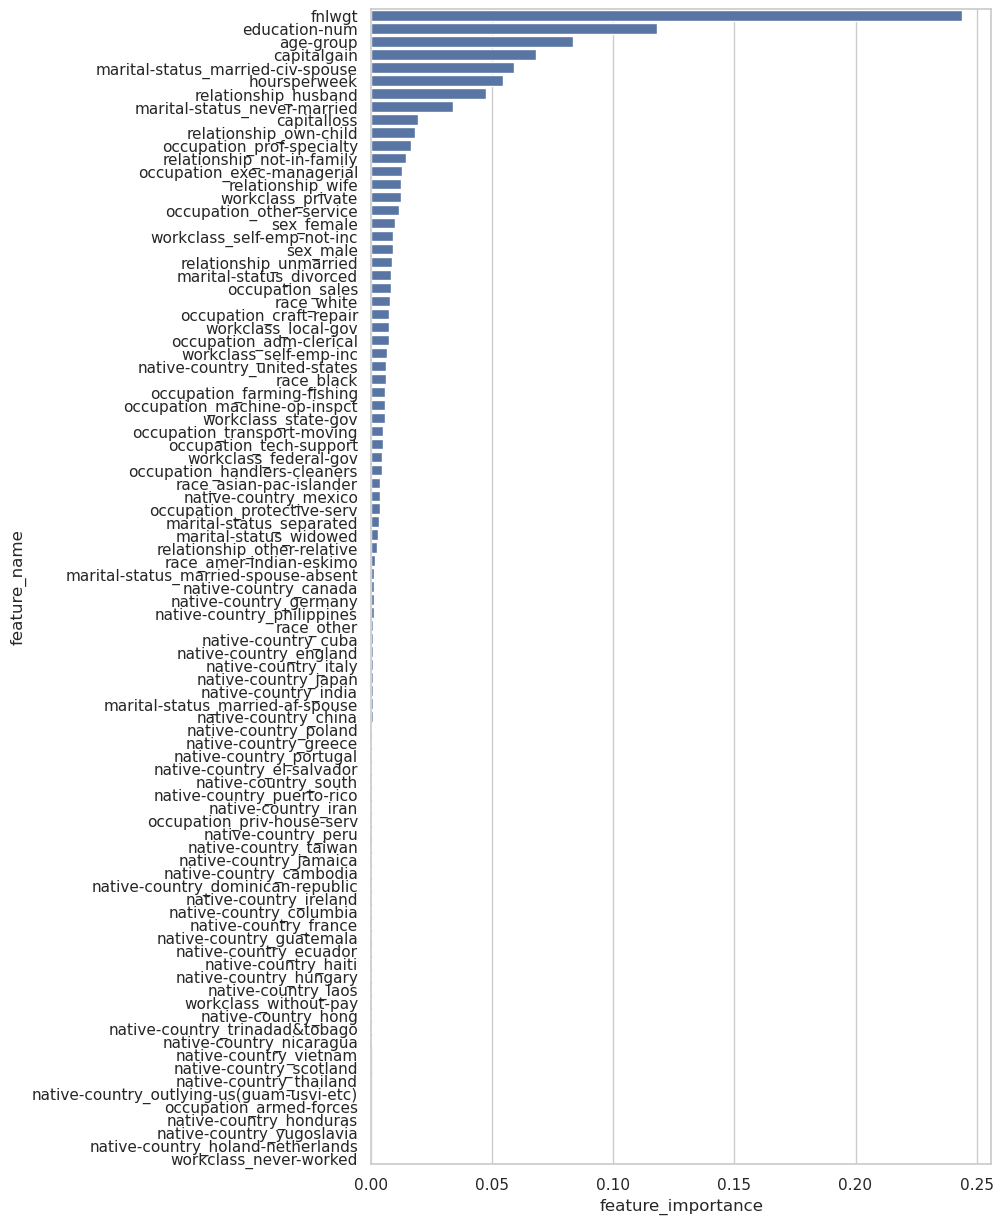

In [71]:
seaborn.set(
    style = 'whitegrid', 
    rc    = {'figure.figsize': (8, 15)}
)

seaborn.barplot(
    data=feature_importance,
    x='feature_importance', 
    y='feature_name'
)

In [72]:
data_train.columns

Index(['fnlwgt', 'age-group', 'education-num', 'capitalgain', 'capitalloss',
       'hoursperweek', 'workclass_self-emp-not-inc', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_local-gov',
       'workclass_federal-gov', 'workclass_state-gov',
       'workclass_never-worked', 'workclass_without-pay',
       'marital-status_never-married', 'marital-status_married-civ-spouse',
       'marital-status_separated', 'marital-status_divorced',
       'marital-status_married-af-spouse', 'marital-status_widowed',
       'marital-status_married-spouse-absent', 'occupation_prof-specialty',
       'occupation_sales', 'occupation_exec-managerial',
       'occupation_craft-repair', 'occupation_machine-op-inspct',
       'occupation_other-service', 'occupation_handlers-cleaners',
       'occupation_tech-support', 'occupation_transport-moving',
       'occupation_farming-fishing', 'occupation_priv-house-serv',
       'occupation_adm-clerical', 'occupation_protective-serv',
       'occ

In [73]:
selected_features= [
    'fnlwgt',
    'education-num',
    'age-group',
    'capitalgain',
    'marital-status_married-civ-spouse',
    'hoursperweek',
    'marital-status_never-married',
    'relationship_husband',
    'capitalloss',
    'relationship_own-child',
    'occupation_prof-specialty',
    'relationship_not-in-family',
    'occupation_exec-managerial',
    'relationship_wife',
    'workclass_private',
    'occupation_other-service'
]

In [74]:
data_train_selected_feature=  data_train[selected_features+['label']]
data_train_selected_feature

,fnlwgt,education-num,age-group,capitalgain,marital-status_married-civ-spouse,hoursperweek,marital-status_never-married,relationship_husband,capitalloss,relationship_own-child,occupation_prof-specialty,relationship_not-in-family,occupation_exec-managerial,relationship_wife,workclass_private,occupation_other-service,label
id,,,,,,,,,,,,,,,,,
2103,1.395470,14.0,2.0,0.0,0.0,2.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
14649,-0.873898,8.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7379,-0.592186,8.0,2.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24479,-1.349595,9.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19532,2.041210,1.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,-1.405521,9.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2192,-0.821560,9.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8250,1.210247,8.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [75]:
data_test_selected_feature=  data_test[selected_features+['label']]
data_test_selected_feature

,fnlwgt,education-num,age-group,capitalgain,marital-status_married-civ-spouse,hoursperweek,marital-status_never-married,relationship_husband,capitalloss,relationship_own-child,occupation_prof-specialty,relationship_not-in-family,occupation_exec-managerial,relationship_wife,workclass_private,occupation_other-service,label
id,,,,,,,,,,,,,,,,,
12849,3.059280,12.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1460,0.513775,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
13594,-0.431650,8.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14400,-0.369947,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
14333,-0.509173,8.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1.502472,11.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2952,-1.293459,11.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
9470,-0.618671,15.0,4.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
data_live_selected_feature=  data_live[selected_features]
data_live_selected_feature

,fnlwgt,education-num,age-group,capitalgain,marital-status_married-civ-spouse,hoursperweek,marital-status_never-married,relationship_husband,capitalloss,relationship_own-child,occupation_prof-specialty,relationship_not-in-family,occupation_exec-managerial,relationship_wife,workclass_private,occupation_other-service
id,,,,,,,,,,,,,,,,
6111,0.934522,6.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11214,-0.211334,8.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5554,-1.552063,8.0,4.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25131,-0.341243,13.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14324,-1.613555,8.0,3.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25998,-0.686323,12.0,4.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8375,1.041543,8.0,4.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13888,-1.466410,6.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [77]:
data_train_selected_feature.to_csv('./data/features.train.csv')
data_test_selected_feature.to_csv('./data/features.test.csv')
data_live_selected_feature.to_csv('./data/features.live.csv')

In [78]:
data_train.to_csv('./data/all_features.train.csv')
data_test.to_csv('./data/all_features.test.csv')
data_live.to_csv('./data/all_features.live.csv')